## Lecture Topic

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
def f(x):
    return 3*x**2 - 3*x + 4

In [4]:
def df(x):
    return 6*x - 3

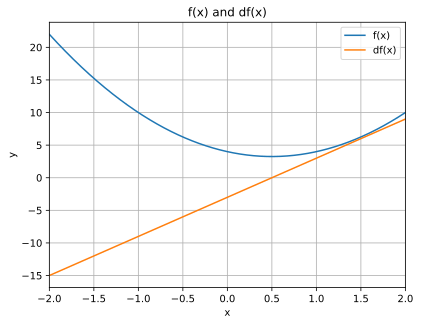

In [5]:
#plot the function and its derivative
x = np.linspace(-2, 2, 2001)
plt.plot(x, f(x), x, df(x))
plt.legend(['f(x)', 'df(x)'])
plt.xlim(x[0], x[-1])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) and df(x)')
plt.show()

In [6]:
local_min = np.random.choice(x)
print('Starting point:', local_min)

Starting point: 1.972


In [7]:
lr = 0.1
training_epochs = 100
#run through the training epochs
for epoch in range(training_epochs):
    gradient = df(local_min)
    local_min = local_min - lr * gradient
print('Local minimum occurs at:', local_min)

Local minimum occurs at: 0.5


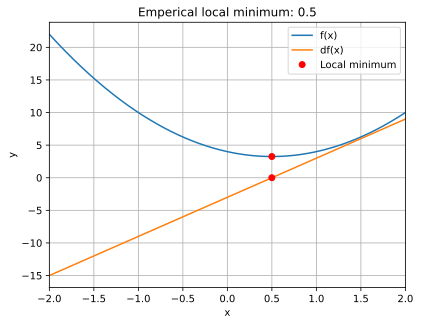

In [8]:
#plot the function and its derivative
plt.plot(x, f(x), x, df(x))
plt.plot(local_min, f(local_min), 'ro')
plt.plot(local_min, df(local_min), 'ro')
plt.legend(['f(x)', 'df(x)', 'Local minimum'])
plt.xlim(x[0], x[-1])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Emperical local minimum: %s" % local_min)
plt.show()

In [9]:
#store the model parameter and output on each iteration
local_min = np.random.choice(x,1)
lr = 0.1
training_epochs = 100
model_params = np.zeros((training_epochs, 2))
for epoch in range(training_epochs):
    gradient = df(local_min)
    local_min = local_min - lr * gradient
    model_params[epoch, 0] = local_min
    model_params[epoch, 1] = gradient

C:\Users\Digital Outlet\AppData\Local\Temp\ipykernel_5444\499977907.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_params[epoch, 0] = local_min
C:\Users\Digital Outlet\AppData\Local\Temp\ipykernel_5444\499977907.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_params[epoch, 1] = gradient


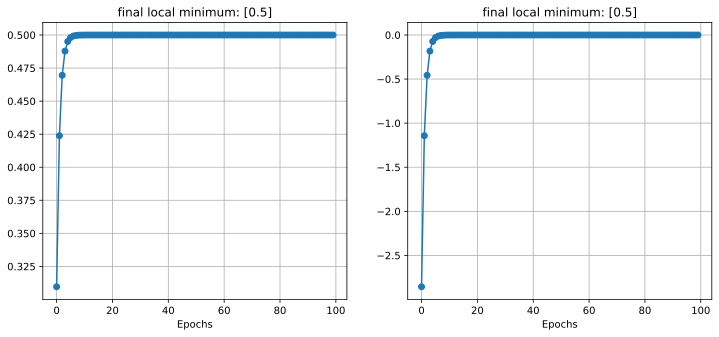

In [12]:
#plot the gradient over the iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i in range(2):
    ax[i].plot(model_params[:, i], 'o-')
    ax[i].grid()
    ax[i].set_xlabel('Epochs')
    ax[i].set_title(f'Final estimated minimum: {local_min[0]:.5f}')
    ax[i].set_title('final local minimum: %s' % local_min)
plt.show()

## Excercise of the Lecture

1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.


In [43]:
local_min = np.random.choice(x)
lr = 0.1
training_epochs = 100
model_params = np.zeros((training_epochs, 2))
for epoch in range(training_epochs):
    gradient = df(local_min)
    if abs(gradient) < 0.05:
        break
    local_min = local_min - lr * gradient
    model_params[epoch, 0] = local_min
    model_params[epoch, 1] = gradient
print('Local minimum occurs at:', local_min)

Local minimum occurs at: 0.49551999999999996


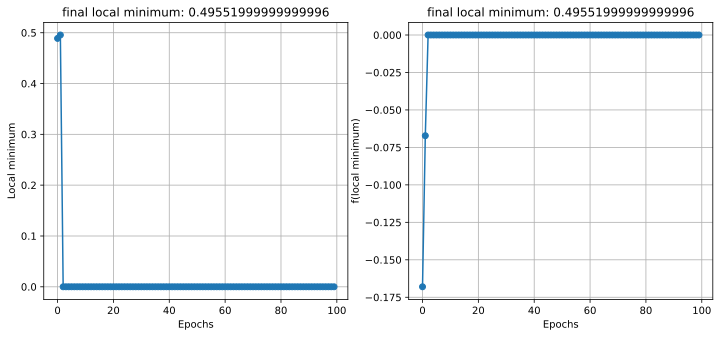

In [44]:
#plot the gradient over the iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i in range(2):
    ax[i].plot(model_params[:, i], 'o-')
    ax[i].grid()
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel(['Local minimum', 'f(local minimum)'][i])
    ax[i].set_title('final local minimum: %s' % local_min)
plt.show()

In [56]:
local_min = np.random.choice(x)
lr = 0.1
training_epochs = 100  
model_params = np.zeros((training_epochs, 2))
for epoch in range(training_epochs):
    gradient = df(local_min)
    if abs(gradient) < 0.0001:
        break
    if epoch % 10 == 0:
        lr *= 1
    local_min = local_min - lr * gradient
    model_params[epoch, 0] = local_min
    model_params[epoch, 1] = gradient
#print(model_params)
print('Local minimum occurs at:', local_min)

Local minimum occurs at: 0.5000071269613569


 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
    `one optimum result found when stopping threshold is 0.0001 and leraning rate = 1, local minimum is 0.500007`

3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
    instead of a specified number of training epochs?
   `  One potential problem that might arise when the stopping criterion is based on the derivative is that the training might stop prematurely if the derivative is close to zero but the loss function has not yet converged. This could lead to suboptimal solutions or models that have not been fully trained.`